# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('E://springboard//mini_project//EDA_racial_disc//data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


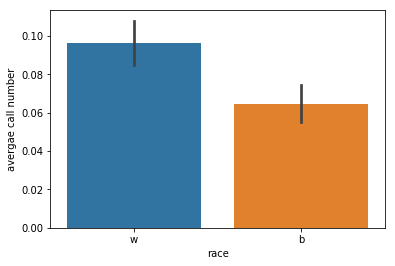

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.barplot(x='race', y='call', data=data)
_ = plt.ylabel('race')
_ = plt.ylabel('avergae call number')
plt.show()

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
<p>1. T-test is used. CLT does apply. The sample is random, independent and large size (n = 2435)</p1> 
<ul>
</ul>
<p>2. H0: Black-sounding names would not receive same average requests for interviews from employers as white-sounding names. 
      Ha: Black-sounding or white-sounding names would have same average requests requests for interviews from employers.
</div> 

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [11]:
# Your solution to Q3 here

import statsmodels
from statsmodels.stats import weightstats

# bootstrap function
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
# get 30 samples from the existing data
w_sample = draw_bs_reps(w.call.values, np.mean, 30)
b_sample = draw_bs_reps(b.call.values, np.mean, 30)

# use t-test with two samples to compare mean values
ttest, tpv = stats.ttest_ind(w_sample, b_sample)
print('p value from bootstrapping: ', tpv)

# use z-test to compare values
anova, apv = stats.f_oneway(w.call, b.call)
print('p value from frequential statistics:', zpv)

p value from bootstrapping:  2.34505245753e-28
p value from frequential statistics: 3.87674291161e-05


In [14]:
z_critical = stats.norm.ppf(q = 0.975)

sample_con = np.concatenate((w_sample, b_sample))

std_con = sample_con.std()
margin_of_error_con = z_critical * (std_con / np.sqrt(len(sample_con)))
confidence_interval_con = (sample_con.mean() - margin_of_error_con,
                      sample_con.mean() + margin_of_error_con)
print('margin of error for sample: ', margin_of_error_con)
print('confidence interval for sample: ', confidence_interval_con)

margin of error for sample:  0.00420447240415
confidence interval for sample:  (0.077020716044879672, 0.085429660853170636)


In [16]:
std = data.call.std()
margin_of_error = z_critical * (std / np.sqrt(len(data)))
confidence_interval = (data.call.mean() - margin_of_error,
                      data.call.mean() + margin_of_error)
print('margin of error: ', margin_of_error)
print('confidence interval: ', confidence_interval)

margin of error:  0.00764151257667
confidence interval:  (0.072851304288773802, 0.088134329442114565)


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
<ol>
     Q4: 
     <li>We investigation on racial discrimination in US labor market and collect data. From the graphical analysis, we see the average calls of resumes containing black-sounding names is lower than the ones containing white-sounding resumes. So we raise a question: Is the average call of resumes with black-sounding names not same as resumes with the ones with white-sounding names?
     <li>We can set our hypothesis as follows.
         <ul>
         <li>H0: Black-sounding names would not receive same average requests for interviews from employers as white-sounding names. 
         <li>Ha: Black-sounding or white-sounding names would have same average requests requests for interviews from employers. 
         </ul>
     <li>We performed bootstrapping and frequential statistics, the p-values of both approaches are less than 0.05. That means we reject null hypothesis. So we can't say that resumes with black-sounding names would not recieve same average interview requests as the ones with white-sounding names. So it seems race is not a significant factor for interview requests.
</ol>
<ol>
     Q5:
     <li>The analysis can not say if race is most important factors in callback success. We only analyze if race difference will have same impacts on callback. We do not know if other factors, such as gender, sex etc, would be more important. We need to do more analysis on other columns on callback. And we also need to do multivariate hypothesis testing to determine which factor is most important.
</ol>

</div>

     